<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [GRAD1] - Linear regression with gradient descent
<!-- DESC --> Low level implementation of a solution by gradient descent. Basic and stochastic approach.
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->


## Objectives :
 - To illustrate the iterative approach of a gradient descent

## What we're going to do :

Equation : $ Y = X.\Theta + N$  
Where N is a noise vector
and $\Theta = (a,b)$ a vector as y = a.x + b

We will calculate a loss function and its gradient.  
We will descend this gradient in order to find a minimum value of our loss function.

$
\triangledown_\theta MSE(\Theta)=\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\Theta)\\
\frac{\partial}{\partial \theta_1}MSE(\Theta)\\
\vdots\\
\frac{\partial}{\partial \theta_n}MSE(\Theta)
\end{bmatrix}=\frac2m X^T\cdot(X\cdot\Theta-Y)
$  

and :  

$\Theta \leftarrow \Theta - \eta \cdot \triangledown_\theta MSE(\Theta)$

where $\eta$ is the learning rate

## Step 1 - Import and init


In [1]:
import numpy as np
import sys

sys.path.append('..')
import fidle.pwk as pwk

from modules.RegressionCooker import RegressionCooker 

# ---- Init Fidle stuffs
#
datasets_dir = pwk.init('GRAD1')

# ---- Instanciate a Regression Cooker
#
cooker = RegressionCooker(pwk)

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.14
Notebook id          : GRAD1
Run time             : Wednesday 10 February 2021, 09:08:53
TensorFlow version   : 2.4.0
Keras version        : 2.4.0
Datasets dir         : /gpfswork/rech/mlh/uja62cb/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


<br>**FIDLE 2020 - Regression Cooker**

Version      : 0.1
Run time     : Wednesday 10 February 2021, 09:08:53


## Step 2 - Get a dataset

### Dataset :

X shape : (1000000, 1)  Y shape : (1000000, 1)  plot : 1000 points


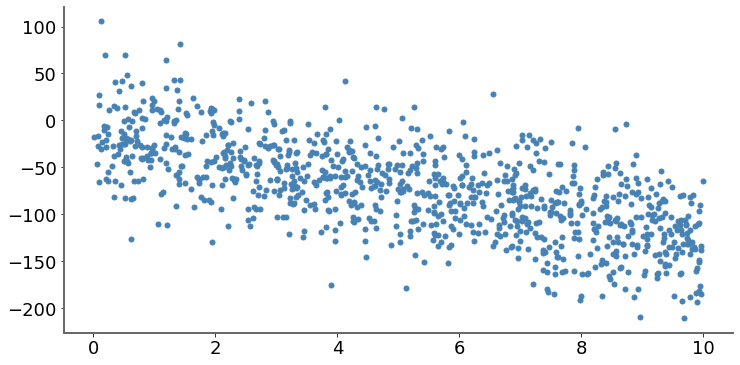

X                :      mean=   4.995  std=   2.890    min=   0.000    max=  10.000
Y                :      mean= -69.938  std=  50.751    min=-275.643    max= 159.547


In [2]:
X,Y = cooker.get_dataset(1000000)

cooker.plot_dataset(X,Y)

## Step 3 : Data normalization

In [3]:
X_norm     = ( X - X.mean() ) / X.std()
Y_norm     = ( Y - Y.mean() ) / Y.std()

cooker.vector_infos('X origine',X)
cooker.vector_infos('X normalized',X_norm)

X origine        :      mean=   4.995  std=   2.890    min=   0.000    max=  10.000
X normalized     :      mean=   0.000  std=   1.000    min=  -1.729    max=   1.732


## Step 4 - Basic descent

### Basic gradient descent :

**With :**  

with :
    epochs = 200
    eta    = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0  +17.429   -8.106  +1.369   -3.972  -0.014


   20   +8.062   -5.412  +0.914   -2.652  -0.237


   40   +3.888   -3.613  +0.610   -1.770  -0.386


   60   +2.027   -2.412  +0.407   -1.182  -0.485


   80   +1.198   -1.610  +0.272   -0.789  -0.551


  100   +0.829   -1.075  +0.182   -0.527  -0.596


  120   +0.664   -0.718  +0.121   -0.352  -0.625


  140   +0.590   -0.479  +0.081   -0.235  -0.645


  160   +0.558   -0.320  +0.054   -0.157  -0.658


  180   +0.543   -0.214  +0.036   -0.105  -0.667


  200   +0.537   -0.143  +0.024   -0.070  -0.673


<br>**Visualization :**

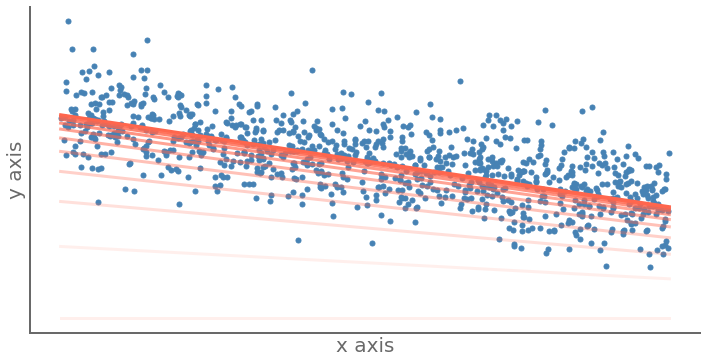

<br>**Loss :**

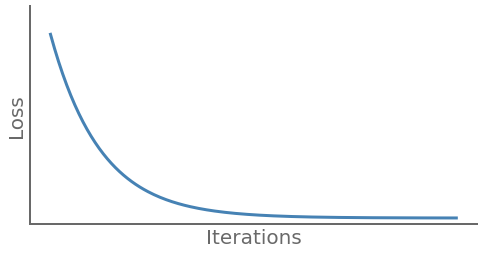

In [4]:
theta = cooker.basic_descent(X_norm, Y_norm, epochs=200, eta=0.01)

## Step 5 - Minibatch descent

### Mini batch gradient descent :

**With :**  

with :
    epochs     = 10
    batchs     = 20
    batch size = 10
    eta        = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0   +0.512   +1.572  -6.818   +0.116  -0.618
    1   +0.700   +8.513  -1.798   -0.115  -0.652
    2   +0.488   -3.844 +11.753   -0.007  -0.697
    3   +0.586   -1.615  -7.463   -0.030  -0.685
    4   +0.342   -0.349  -0.305   -0.033  -0.699
    5   +0.371   -4.031  +8.609   -0.002  -0.715
    6   +0.586   +6.248  -1.765   -0.003  -0.698
    7   +0.404   -0.939  +1.819   +0.031  -0.701
    8   +0.689   -2.256  +6.564   -0.001  -0.711
    9   +0.587   -3.874  -1.603   +0.006  -0.694


<br>**Visualization :**

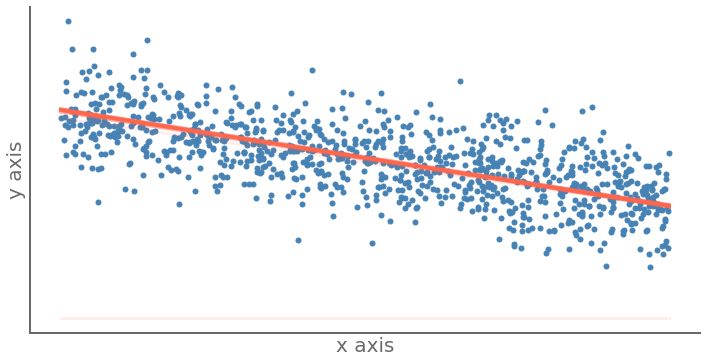

<br>**Loss :**

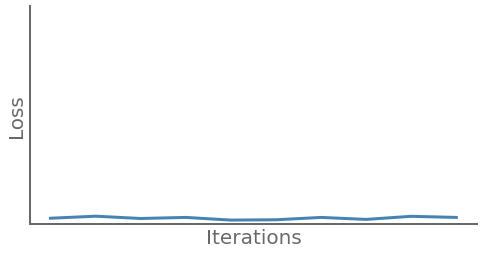

In [5]:
theta = cooker.minibatch_descent(X_norm, Y_norm, epochs=10, batchs=20, batch_size=10, eta=0.01)

In [6]:
pwk.end()

End time is : Wednesday 10 February 2021, 09:08:59
Duration is : 00:00:05 399ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>